In [1]:
import pandas as pd
#~~~~~~~~~~~~~~~~~~~~
import numpy as np

In [2]:
import os.path
#~~~~~~~~~~~~~~~~~~~~~~
from PIL import Image

In [3]:
import matplotlib.pyplot as plt
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import seaborn as sns
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
%matplotlib inline

In [4]:
plt.style.use(
              [
               'bmh',
               'dark_background'
              ]
             )

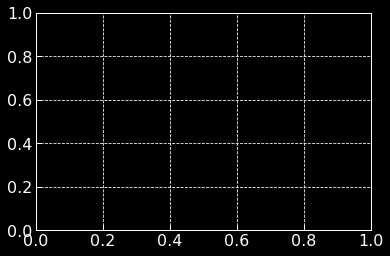

In [5]:
#sns.set_context('notebook')
#sns.set_context('paper')
#sns.set_context('talk')
#sns.set_context('poster')

sns.set_context(
                'paper',
                font_scale = 1.8
               )

fig, ax = plt.subplots()

# PART (1) — LOAD from CSV to DataFrame

In [6]:
data_folder_path = ('~/SBNation_Articles_Soccer_Data/' +
                     'Player_Comparisons/' +
                     'Oeuvrenalysis_Calhanoglu/' +
                     'DATA_playmakers_20_21/')
data_folder_path

'~/SBNation_Articles_Soccer_Data/Player_Comparisons/Oeuvrenalysis_Calhanoglu/DATA_playmakers_20_21/'

In [7]:
file_path = (data_folder_path +
             'Standard_Stats_20_21.csv')
file_path

'~/SBNation_Articles_Soccer_Data/Player_Comparisons/Oeuvrenalysis_Calhanoglu/DATA_playmakers_20_21/Standard_Stats_20_21.csv'

In [8]:
Standard_Stats_df = pd.read_csv(file_path)

In [9]:
Standard_Stats_df

,Player,Span,Nation,Pos,Squad,MP,Starts,Min,90s,Gls,...,G+A-PK_per_90,xG,npxG,xA,npxG+xA,xG_per_90,xA_per_90,xG+xA_per_90,npxG_per_90,npxG+xA_per_90
0,Christian Eriksen,2020-21,DEN,MF,Inter,26,17,1385,15.4,3,...,0.19,1.7,1.7,2.6,4.3,0.11,0.17,0.28,0.11,0.28
1,Luis Alberto,2020-21,ESP,MF,Lazio,34,33,2618,29.1,9,...,0.38,5.5,5.3,8.2,13.5,0.19,0.28,0.47,0.18,0.46
2,Hakan Çalhanoğlu,2020-21,TUR,MFFW,Milan,33,30,2614,29.0,4,...,0.41,5.5,4.8,8.8,13.5,0.19,0.30,0.49,0.16,0.47


In [10]:
columns_list = list(
                    Standard_Stats_df.columns
                   )
columns_list

['Player',
 'Span',
 'Nation',
 'Pos',
 'Squad',
 'MP',
 'Starts',
 'Min',
 '90s',
 'Gls',
 'Ast',
 'G-PK',
 'PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'Gls_per_90',
 'Ast_per_90',
 'G+A_per_90',
 'G-PK_per_90',
 'G+A-PK_per_90',
 'xG',
 'npxG',
 'xA',
 'npxG+xA',
 'xG_per_90',
 'xA_per_90',
 'xG+xA_per_90',
 'npxG_per_90',
 'npxG+xA_per_90']

In [11]:
Stat_Numbers = Standard_Stats_df.loc[:,
                                     'MP':'npxG+xA_per_90'
                                    ]
Stat_Numbers

,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,...,G+A-PK_per_90,xG,npxG,xA,npxG+xA,xG_per_90,xA_per_90,xG+xA_per_90,npxG_per_90,npxG+xA_per_90
0,26,17,1385,15.4,3,0,3,0,0,1,...,0.19,1.7,1.7,2.6,4.3,0.11,0.17,0.28,0.11,0.28
1,34,33,2618,29.1,9,2,9,0,0,5,...,0.38,5.5,5.3,8.2,13.5,0.19,0.28,0.47,0.18,0.46
2,33,30,2614,29.0,4,9,3,1,1,4,...,0.41,5.5,4.8,8.8,13.5,0.19,0.30,0.49,0.16,0.47


In [12]:
#Stats_df = 

Stat_Numbers.insert(loc = 0,
                               column = 'Player',
                               value = Standard_Stats_df['Player']
                              )

In [13]:
Stat_Numbers

,Player,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,...,G+A-PK_per_90,xG,npxG,xA,npxG+xA,xG_per_90,xA_per_90,xG+xA_per_90,npxG_per_90,npxG+xA_per_90
0,Christian Eriksen,26,17,1385,15.4,3,0,3,0,0,...,0.19,1.7,1.7,2.6,4.3,0.11,0.17,0.28,0.11,0.28
1,Luis Alberto,34,33,2618,29.1,9,2,9,0,0,...,0.38,5.5,5.3,8.2,13.5,0.19,0.28,0.47,0.18,0.46
2,Hakan Çalhanoğlu,33,30,2614,29.0,4,9,3,1,1,...,0.41,5.5,4.8,8.8,13.5,0.19,0.30,0.49,0.16,0.47


In [14]:
Stats_df = Stat_Numbers

Stats_df

,Player,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,...,G+A-PK_per_90,xG,npxG,xA,npxG+xA,xG_per_90,xA_per_90,xG+xA_per_90,npxG_per_90,npxG+xA_per_90
0,Christian Eriksen,26,17,1385,15.4,3,0,3,0,0,...,0.19,1.7,1.7,2.6,4.3,0.11,0.17,0.28,0.11,0.28
1,Luis Alberto,34,33,2618,29.1,9,2,9,0,0,...,0.38,5.5,5.3,8.2,13.5,0.19,0.28,0.47,0.18,0.46
2,Hakan Çalhanoğlu,33,30,2614,29.0,4,9,3,1,1,...,0.41,5.5,4.8,8.8,13.5,0.19,0.30,0.49,0.16,0.47


In [15]:
Stats_df.set_index('Player',
                   inplace = True
                  )

Stats_df

,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,...,G+A-PK_per_90,xG,npxG,xA,npxG+xA,xG_per_90,xA_per_90,xG+xA_per_90,npxG_per_90,npxG+xA_per_90
Player,,,,,,,,,,,,,,,,,,,,,
Christian Eriksen,26,17,1385,15.4,3,0,3,0,0,1,...,0.19,1.7,1.7,2.6,4.3,0.11,0.17,0.28,0.11,0.28
Luis Alberto,34,33,2618,29.1,9,2,9,0,0,5,...,0.38,5.5,5.3,8.2,13.5,0.19,0.28,0.47,0.18,0.46
Hakan Çalhanoğlu,33,30,2614,29.0,4,9,3,1,1,4,...,0.41,5.5,4.8,8.8,13.5,0.19,0.30,0.49,0.16,0.47


# PART (2) — identify RANKINGS per column

In [16]:
Stat_RANKS_df = (Stats_df.rank(ascending = 0,
                              #     '0' = 'False'
                               method = 'min'
                              )
                    .astype(int)
                   )

In [17]:
Stat_RANKS_df

,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,...,G+A-PK_per_90,xG,npxG,xA,npxG+xA,xG_per_90,xA_per_90,xG+xA_per_90,npxG_per_90,npxG+xA_per_90
Player,,,,,,,,,,,,,,,,,,,,,
Christian Eriksen,3,3,3,3,3,3,2,2,2,3,...,3,3,3,3,3,3,3,3,3,3
Luis Alberto,1,1,1,1,1,2,1,2,2,1,...,2,1,1,2,1,1,2,2,1,2
Hakan Çalhanoğlu,2,2,2,2,2,1,2,1,1,2,...,1,1,2,1,1,1,1,1,2,1


In [18]:
#Stat_RANKS_df.plot.hist()

# PART (3) — TRANSPOSE both OG and RANKS dataframes

In [19]:
Stats_Transposed = Stats_df.transpose()

Stats_Transposed

Player,Christian Eriksen,Luis Alberto,Hakan Çalhanoğlu
MP,26.00,34.00,33.00
Starts,17.00,33.00,30.00
Min,1385.00,2618.00,2614.00
90s,15.40,29.10,29.00
Gls,3.00,9.00,4.00
Ast,0.00,2.00,9.00
G-PK,3.00,9.00,3.00
PK,0.00,0.00,1.00
PKatt,0.00,0.00,1.00
CrdY,1.00,5.00,4.00


In [20]:
Ranks_Transposed = Stat_RANKS_df.transpose()

Ranks_Transposed

Player,Christian Eriksen,Luis Alberto,Hakan Çalhanoğlu
MP,3,1,2
Starts,3,1,2
Min,3,1,2
90s,3,1,2
Gls,3,1,2
Ast,3,2,1
G-PK,2,1,2
PK,2,2,1
PKatt,2,2,1
CrdY,3,1,2


In [21]:
# sns.set_context('talk')

# Ranks_Transposed.plot.hist()

In [22]:
# Ranks_Transposed.plot.hist(
#                            # column = "Christian Eriksen",
#                            "Christian Eriksen",
#                            # bins = 3
#                           )

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

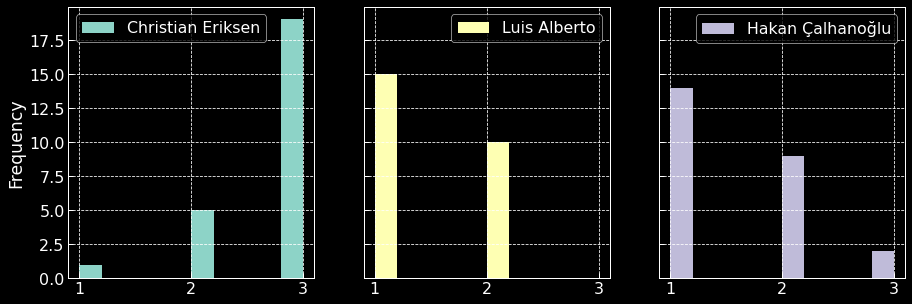

In [38]:
Ranks_Transposed.plot.hist(#bins = 3

                           #by = "Christian Eriksen",
                           # "Christian Eriksen",

                           use_index = True,

                           #legend = {'reverse'},

                           #,

                           subplots = True,

                           sharex = True,

                           sharey = True,

                           #fontsize = 1.2,

                           xticks = (1,
                                     2,
                                     3
                                    ),  # ,

                           # figsize = 2,
                           figsize = (
                                      15,  # width (inches)
                                      5  # height (also inches)
                                     ),

                           layout = (1,  # number of "rows" for subplots
                                     3  # number of subplot "columns"
                                    )

                           #,

                           #,

                          )

In [25]:
# Ranks_Transposed.hist(column = "Christian Eriksen",
#                       #     "Christian Eriksen",
                      
#                       # bins = 3
#                      )

In [26]:
# Ranks_Transposed.hist()

In [27]:
# Ranks_Transposed.hist(#sharey = True,
#                       sharex = True
#                      )

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

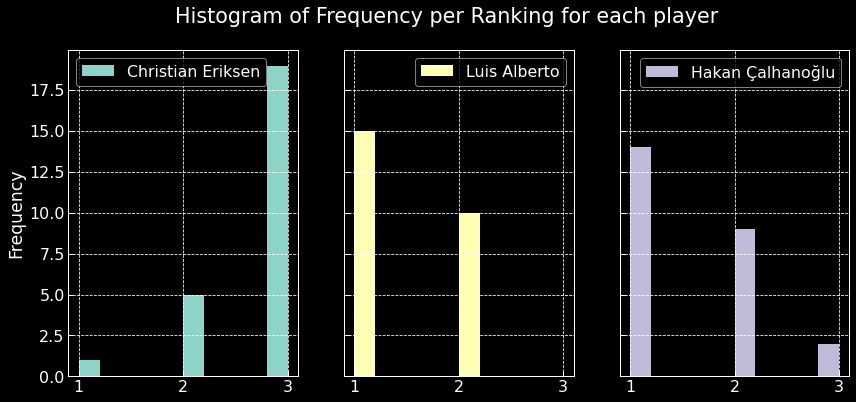

In [48]:
Ranks_Transposed.plot.hist(use_index = True,

                           subplots = True,

                           sharex = True,
                           sharey = True,

                           xticks = (1, 2, 3
                                    ),
                           
                           # alpha = 0.5,
                           
                           title = "Histogram of Frequency per Ranking for each player",

                           figsize = (14,  # width (inches)
                                      6  # height (also inches)
                                     ),

                           layout = (1,  # number of "rows" for subplots
                                     3  # number of subplot "columns"
                                    )
                          )

array([[<AxesSubplot:xlabel='Frequency'>],
       [<AxesSubplot:xlabel='Frequency'>],
       [<AxesSubplot:xlabel='Frequency'>]], dtype=object)

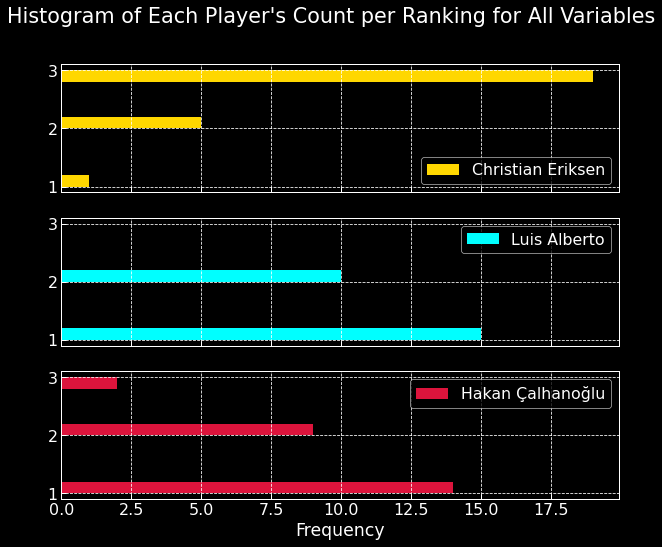

In [64]:
Ranks_Transposed.plot.hist(use_index = True,

                           subplots = True,
                           
                           orientation = 'horizontal',

                           yticks = (1, 2, 3
                                    ),
                           
#                            yticks = (3,
#                                      2,
#                                      1
#                                     ),
                           
                           sharex = True,
                           sharey = True,

#                            xticks = (1, 2, 3
#                                     ),
                           
                           color = ('gold',   #  Eriksen
                                    #'yellow',
                                    
                                    'aqua',  # Luis Alberto
                                    #'lightblue',
                                    
                                    'crimson'   #  Calhanoglu
                                    #'red',
                                   ),
                           
                           # alpha = 0.5,
                           
                           title = "Histogram of Each Player's Count per Ranking for All Variables",

#                            figsize = (15,  # width (inches)
#                                       10  # height (also inches)
#                                      ),
                           
                           figsize = (10,  # width (inches)
                                      8  # height (also inches)
                                     ),

                           layout = (3,  # number of "rows" for subplots
                                     1  # number of subplot "columns"
                                    )
                          )

array([[<AxesSubplot:xlabel='Frequency'>],
       [<AxesSubplot:xlabel='Frequency'>],
       [<AxesSubplot:xlabel='Frequency'>]], dtype=object)

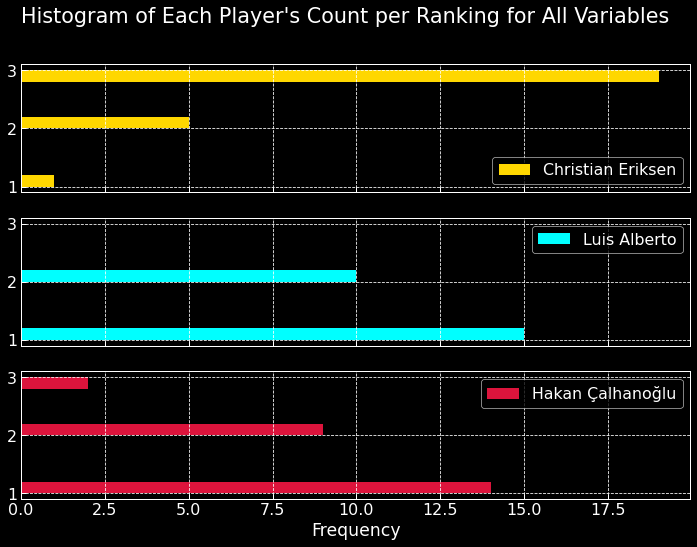

In [95]:
Ranks_Transposed.plot.hist(use_index = True,

                           subplots = True,
                           
                           orientation = 'horizontal',
                           
                           
                           figsize = (12,  # width (inches)
                                      8  # height (also inches)
                                     ),

                           layout = (3,  # number of "rows" for subplots
                                     1  # number of subplot "columns"
                                    ),

#                            xticks = (1, 2, 3
#                                     ),

                           yticks = (# 0,
                                     1, 2, 3   # ,
                                     # 4
                                    ),
                           
                           sharex = True,
                           sharey = True,

                           
                           color = ('gold',  #  Eriksen
                                    'aqua',   #  Luis Alberto
                                    'crimson'  #  Calhanoglu
                                   ),
                           
                           # alpha = 0.8,
                           
                           # rwidth = 5,     # 3.5,    # 1.5,   # 0.9,
                           
                           title = "Histogram of Each Player's Count per Ranking for All Variables"
                          )